## Movie Data Set Notebook #1 -- General Preprocessing

In [1]:
# General imports here.
import pandas as pd
import numpy as np
import sklearn as sk
import math
import ast
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the csv files and index appropriately.
#ratings_small_df = pd.read_csv('./data/ratings_small.csv')
#ratings_df = pd.read_csv('./data/ratings.csv')
#links_small_df = pd.read_csv('./data/links_small.csv')
#links_df = pd.read_csv('./data/links.csv')
keywords_df = pd.read_csv('./data/keywords.csv')
credits_df = pd.read_csv('./data/credits.csv')
metadata_df = pd.read_csv('./data/movies_metadata.csv')

In [3]:
# These three files seem to be the ones we want. Indexed on ID, we could probably combine them now.
keywords_df = keywords_df.set_index('id')
credits_df = credits_df.set_index('id')
metadata_df = metadata_df.set_index('id')
None

In [4]:
# Join the useful data frames together
temp = keywords_df.join(credits_df)
movie_df = metadata_df.join(temp)

In [5]:
# Here I'm just doing some of the same stuff "The Story of Film" did on Kaggle.
# This all makes sense, it's pretty standard.
movie_df = movie_df.drop(['imdb_id'], axis=1)
movie_df = movie_df.drop(['original_title'], axis=1)
movie_df = movie_df.drop(['video'], axis=1)
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
movie_df['poster_path'] = "<img src='" + base_poster_url + movie_df['poster_path'] + "' style='height:100px;'>"

In [6]:
# Clean up from https://www.kaggle.com/hadasik/movies-analysis-visualization-newbie
def get_values(data_str):
    if isinstance(data_str, float):
        pass
    else:
        values = []
        data_str = ast.literal_eval(data_str)
        if isinstance(data_str, list):
            for k_v in data_str:
                values.append(k_v['name'])
            return values
        else:
            return None

In [7]:
movie_df[['genres']] = movie_df[['genres']].applymap(get_values)
movie_df[['production_companies', 'production_countries']] = movie_df[['production_companies', 'production_countries']].applymap(get_values)
movie_df[['spoken_languages', 'keywords']] = movie_df[['spoken_languages', 'keywords']].applymap(get_values)
movie_df[['cast', 'crew']] = movie_df[['cast', 'crew']].applymap(get_values)
# This takes a while to run.
# Also, it gets rid of character data and position in the crew. We may want that information.

In [8]:
# Make the Collection feature readable. The previously defined function doesn't seem to work for this feature.
temp = movie_df[movie_df['belongs_to_collection'].notnull()]
temp = temp['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
for index in temp.index:
    movie_df.loc[index, 'belongs_to_collection'] = temp.loc[index]
movie_df['belongs_to_collection'].fillna(0, inplace=True)

In [9]:
# I took care of some of the NaN values already.
movie_df = movie_df[pd.notnull(movie_df['title'])]
movie_df = movie_df[pd.notnull(movie_df['keywords'])]
movie_df = movie_df[pd.notnull(movie_df['original_language'])]
movie_df = movie_df[pd.notnull(movie_df['status'])]
movie_df = movie_df[pd.notnull(movie_df['release_date'])]
movie_df = movie_df[pd.notnull(movie_df['poster_path'])]
movie_df = movie_df[pd.notnull(movie_df['overview'])]
movie_df = movie_df[pd.notnull(movie_df['runtime'])]

In [10]:
# Make the homepage feature a binary variable since we don't care what the URL is.
movie_df['homepage'].fillna(0, inplace=True)
movie_df.loc[movie_df['homepage'] != 0, 'homepage'] = 1

In [11]:
# Replace tagline NaNs
movie_df['tagline'].fillna(0, inplace=True)
# Drop status when not released.
movie_df = movie_df.loc[movie_df['status'] == 'Released']
movie_df = movie_df.drop(['status'], axis = 1)

In [12]:
# Check for NaNs. None, that's good.
print(movie_df.isnull().any())

belongs_to_collection    False
budget                   False
genres                   False
homepage                 False
original_language        False
overview                 False
poster_path              False
production_companies     False
production_countries     False
release_date             False
revenue                  False
runtime                  False
spoken_languages         False
tagline                  False
title                    False
vote_average             False
vote_count               False
keywords                 False
cast                     False
crew                     False
dtype: bool


In [13]:
# belongs_to_collection: Similar to tagline, we may just want a binary variable
# poster_path: The links inside it seem to work after adding the base URL. Toy Story works, at least.
# tagline: Until we actually analyze the taglines, I think we should just replace with a tag_presence binary variable
# revenue and budget are both missing a lot of data, we'll have to deal with that.
movie_df.head().transpose()

id,2,3,5,6,11
belongs_to_collection,0,0,0,0,Star Wars Collection
budget,0,0,4000000,0,11000000
genres,"[Drama, Crime]","[Drama, Comedy]","[Crime, Comedy]","[Action, Thriller, Crime]","[Adventure, Action, Science Fiction]"
homepage,0,0,0,0,1
original_language,fi,fi,en,en,en
overview,Taisto Kasurinen is a Finnish coal miner whose...,"An episode in the life of Nikander, a garbage ...",It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Princess Leia is captured and held hostage by ...
poster_path,<img src='http://image.tmdb.org/t/p/w185//gZCJ...,<img src='http://image.tmdb.org/t/p/w185//7ad4...,<img src='http://image.tmdb.org/t/p/w185//eQs5...,<img src='http://image.tmdb.org/t/p/w185//lNXm...,<img src='http://image.tmdb.org/t/p/w185//btTd...
production_companies,"[Villealfa Filmproduction Oy, Finnish Film Fou...",[Villealfa Filmproduction Oy],"[Miramax Films, A Band Apart]","[Universal Pictures, Largo Entertainment, JVC ...","[Lucasfilm, Twentieth Century Fox Film Corpora..."
production_countries,[Finland],[Finland],[United States of America],"[Japan, United States of America]",[United States of America]
release_date,10/21/1988,10/16/1986,12/9/1995,10/15/1993,5/25/1977


In [14]:
movie_df.describe()

,budget,revenue,runtime,vote_average,vote_count
count,4.480900e+04,4.480900e+04,44809.000000,44809.000000,44809.000000
mean,4.326793e+06,1.147099e+07,95.436586,5.670048,112.253186
std,1.760014e+07,6.504556e+07,37.242841,1.850511,495.731625
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,86.000000,5.000000,3.000000
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,36.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000


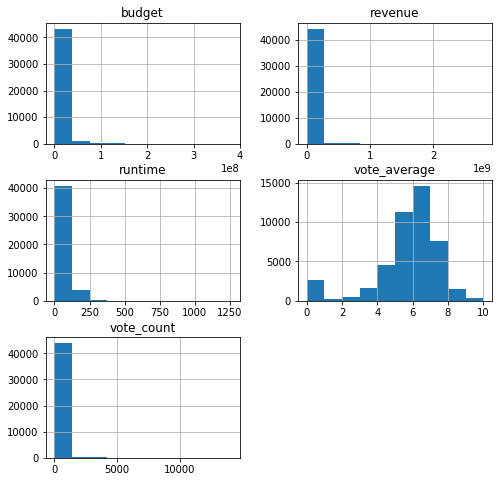

In [15]:
_ = movie_df.hist(figsize=(8,8))

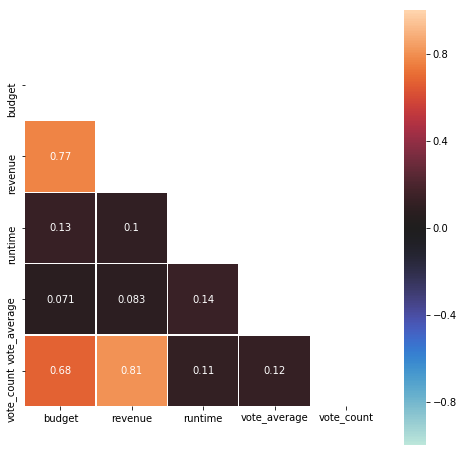

In [16]:
# A quick heatmap. It seems revenue and the number of votes are correlated.
corr = movie_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8, 8))
_ = sns.heatmap(corr, vmax=1, vmin=-1, mask=mask, square=True, annot=True, linewidths=0.2, center=0)

In [17]:
# Toy Story Entry Example, looking it up by ID number
print(movie_df.loc[862])

belongs_to_collection                                 Toy Story Collection
budget                                                            30000000
genres                                         [Animation, Comedy, Family]
homepage                                                                 1
original_language                                                       en
overview                 Led by Woody, Andy's toys live happily in his ...
poster_path              <img src='http://image.tmdb.org/t/p/w185//rhIR...
production_companies                             [Pixar Animation Studios]
production_countries                            [United States of America]
release_date                                                    10/30/1995
revenue                                                        3.73554e+08
runtime                                                                 81
spoken_languages                                                 [English]
tagline                  

In [18]:
actors = []
num_movies = []
revenue_avg = []
counter = 0
for index, row in movie_df.iterrows():
    cast = row['cast']
    revenue = row['revenue']
    for person in cast:
        try:
            index = actors.index(person)
        except:
            index = -1
        if(index != -1):
            temp = revenue_avg[index] * num_movies[index]
            temp += revenue
            num_movies[index] += 1
            revenue_avg[index] = temp/num_movies[index]
        else:
            actors.append(person)
            num_movies.append(1)
            revenue_avg.append(revenue)
        if(counter%10000 == 0):
            print(counter)
        counter += 1

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000


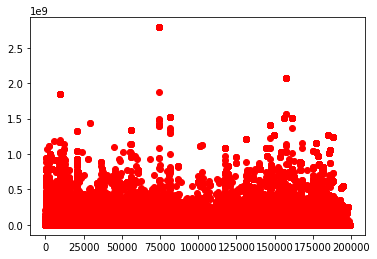

In [19]:
x = []
for i in range(0,len(actors)):
    x.append(i)
plt.plot(x,revenue_avg, 'ro')
plt.show()

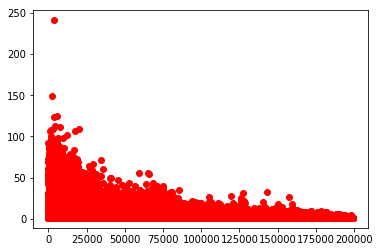

In [20]:
plt.plot(x,num_movies, 'ro')
plt.show()

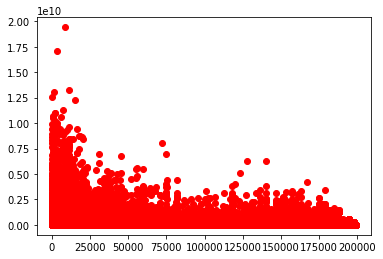

In [21]:
shifted_revenue = []
for i in range(0,len(revenue_avg)):
    shifted_revenue.append(revenue_avg[i] * num_movies[i])
plt.plot(x,shifted_revenue, 'ro')
plt.show()

In [22]:
shift_idx = shifted_revenue.index(max(shifted_revenue))
print(actors[shift_idx])
print(num_movies[shift_idx])
print(revenue_avg[shift_idx])
print(shifted_revenue[shift_idx])

Stan Lee
48
404478282.3958333
19414957555.0


In [23]:
idx = revenue_avg.index(max(revenue_avg))
print(actors[idx])
print(num_movies[idx])
print(revenue_avg[idx])
idx2 = num_movies.index(max(num_movies))
print(actors[idx2])
print(num_movies[idx2])
print(revenue_avg[idx2])
idx3 = actors.index("Tom Hanks")
print(actors[idx3])
print(num_movies[idx3])
print(revenue_avg[idx3])
idx4 = actors.index("Sam Worthington")
print(actors[idx4])
print(num_movies[idx4])
print(revenue_avg[idx4])

Sean Anthony Moran
1
2787965087.0
Bess Flowers
241
1530760.4107883824
Tom Hanks
72
138001974.58333334
Sam Worthington
27
159055838.66666663


In [24]:
print(movie_df.loc[862]['belongs_to_collection'])

Toy Story Collection


In [25]:
print(movie_df.loc[862]['cast'])

['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn', 'John Ratzenberger', 'Annie Potts', 'John Morris', 'Erik von Detten', 'Laurie Metcalf', 'R. Lee Ermey', 'Sarah Freeman', 'Penn Jillette']


In [26]:
# We could only do movies where the original language is English.
movie_df.loc[movie_df['original_language'] == 'en'].shape

(32199, 20)